In [1]:
# 
# calculate the advection-diffusion equation
# using simpliest first-order numerical method

import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

import scipy
from scipy import interpolate
from scipy.sparse import diags
import scipy.sparse as sp

# constant variables
PI = math.pi

# time step
Dt = 60 # [s]

# grid resolution
Dx = 100 # [m]
Dy = 10 # [m]

# grid number

X_len = 2.0e5 # 8.0e4
Y_len = 1.6e3



Nx = int(X_len/Dx)
Ny = int(Y_len/Dy)

i_init = round(Nx/2)
j_init = round(Ny/2)
print('center:',i_init,j_init)

x = []
for i in range(Nx):
    x.append((i-i_init)*Dx)
    
y = []
for j in range(Ny):
    y.append((j-j_init)*Dy)

X, Y = np.meshgrid(x, y)

# define diffusion coefficient
Diff_x = 10.0 # [m2 s-1]
Diff_y = 0.15 # [m2 s-1]


center: 1000 80


In [2]:
print( np.tan(2/180*PI) )

0.03492076949174773


U.shape: (160, 2000)


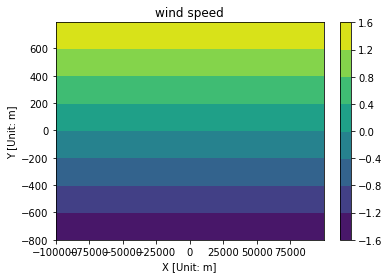

In [3]:
# define a fixed wind field
U_shear = 0.002 # [s-1]

V = np.zeros([Ny,Nx]) # [m]
U = np.zeros([Ny,Nx])
print('U.shape:',U.shape)

for j in range(Ny):
    U[j,:] = Y[j,:] * U_shear # [m]
    
plt.contourf(X,Y,U)
plt.colorbar()
plt.xlabel('X [Unit: m]')
plt.ylabel('Y [Unit: m]')
plt.title( 'wind speed' )
plt.show()


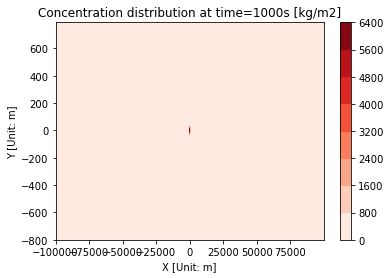

In [4]:
# *** Attention: this gaussian analytical results NOT requires Dv=Dh
# Chris J. Walcek-A Gaussian dispersionplume model explicitly accoun

t0 = 1000*1 # [s]

# gaussian analytical result
Sigma0_x = math.sqrt( 2.0*Diff_x*t0 ) # [m]
Sigma0_y = math.sqrt( 2.0*Diff_y*t0 ) # [m]

s = U_shear*t0* Sigma0_y/Sigma0_x

cc = 1e8 # [kg] or [kg/s]

C0_gau = np.zeros([Ny,Nx])

for j in np.arange(1,Ny-1,1):
    for i in np.arange(1,Nx-1,1):
        
        xx = X[j,i]
        yy = Y[j,i]
        C0_gau[j,i] = cc/( 2*PI*Sigma0_x*Sigma0_y*math.sqrt(1+s**2/12) )* \
                        math.exp(-xx**2/(2*Sigma0_x**2*(1+s**2/12)) \
                                 -yy**2*(1+s**2 /3)/(2*Sigma0_y**2*(1+s**2/12)) \
                                 +xx*yy/(2*Sigma0_x*Sigma0_y)*(s/(1+s**2/12))
                                 )
        # calculate the domain average        
        if 1==1:
            xx = X[j,i]
            yy = Y[j,i]
            C1_gau = cc/( 2*PI*Sigma0_x*Sigma0_y*math.sqrt(1+s**2/12) )* \
                        math.exp(-xx**2/(2*Sigma0_x**2*(1+s**2/12)) \
                                 -yy**2*(1+s**2 /3)/(2*Sigma0_y**2*(1+s**2/12)) \
                                 +xx*yy/(2*Sigma0_x*Sigma0_y)*(s/(1+s**2/12))
                                 )
        
            xx = (X[j,i]+X[j+1,i])/2
            yy = (Y[j,i]+Y[j+1,i])/2
            C2_gau = cc/( 2*PI*Sigma0_x*Sigma0_y*math.sqrt(1+s**2/12) )* \
                        math.exp(-xx**2/(2*Sigma0_x**2*(1+s**2/12)) \
                                 -yy**2*(1+s**2 /3)/(2*Sigma0_y**2*(1+s**2/12)) \
                                 +xx*yy/(2*Sigma0_x*Sigma0_y)*(s/(1+s**2/12))
                                 )

            xx = (X[j,i]+X[j-1,i])/2
            yy = (Y[j,i]+Y[j-1,i])/2
            C3_gau = cc/( 2*PI*Sigma0_x*Sigma0_y*math.sqrt(1+s**2/12) )* \
                        math.exp(-xx**2/(2*Sigma0_x**2*(1+s**2/12)) \
                                 -yy**2*(1+s**2 /3)/(2*Sigma0_y**2*(1+s**2/12)) \
                                 +xx*yy/(2*Sigma0_x*Sigma0_y)*(s/(1+s**2/12))
                                 )

            xx = (X[j,i]+X[j,i+1])/2
            yy = (Y[j,i]+Y[j,i+1])/2
            C4_gau = cc/( 2*PI*Sigma0_x*Sigma0_y*math.sqrt(1+s**2/12) )* \
                        math.exp(-xx**2/(2*Sigma0_x**2*(1+s**2/12)) \
                                 -yy**2*(1+s**2 /3)/(2*Sigma0_y**2*(1+s**2/12)) \
                                 +xx*yy/(2*Sigma0_x*Sigma0_y)*(s/(1+s**2/12))
                                 )
        
            xx = (X[j,i]+X[j,i-1])/2
            yy = (Y[j,i]+Y[j,i-1])/2
            C5_gau = cc/( 2*PI*Sigma0_x*Sigma0_y*math.sqrt(1+s**2/12) )* \
                        math.exp(-xx**2/(2*Sigma0_x**2*(1+s**2/12)) \
                                 -yy**2*(1+s**2 /3)/(2*Sigma0_y**2*(1+s**2/12)) \
                                 +xx*yy/(2*Sigma0_x*Sigma0_y)*(s/(1+s**2/12))
                                 )
        
            C0_gau[j,i] = (4*C1_gau+C2_gau+C3_gau+C4_gau+C5_gau)/8
        

        
contours = plt.contourf(X, Y, C0_gau, cmap='Reds')

plt.colorbar()
plt.title( 'Concentration distribution at time='+str(t0)+'s [kg/m2]' )
plt.xlabel('X [Unit: m]')
plt.ylabel('Y [Unit: m]')

plt.show()

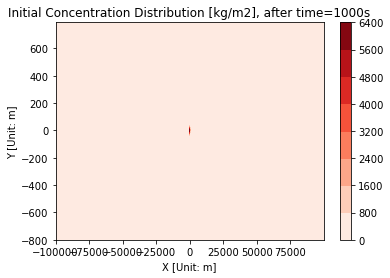

In [5]:
# define initial concentration distribution
Concnt = np.zeros([Ny,Nx])
C_old  = np.zeros([Ny,Nx])

#Concnt[j_init-2:j_init+3,i_init-2:i_init+3] = 1000.0 # [molec m2]
Concnt = C0_gau # [molec m2]

contours = plt.contourf(X, Y, Concnt, cmap='Reds')
plt.xlabel('X [Unit: m]')
plt.ylabel('Y [Unit: m]')
plt.title( 'Initial Concentration Distribution [kg/m2], after time='+str(t0)+'s' )
plt.colorbar()

ynew = np.arange(0, 1000, 10)
xnew = ynew*U_shear*t0

theta = np.arctan( (xnew[2]-xnew[1])/(ynew[2]-ynew[1]) )
xnew2 = -ynew/np.tan(theta)
    
#plt.plot(xnew,ynew,'b')
#plt.plot(xnew2,ynew,'k')

plt.show()

In [6]:
# Lax–Wendroff Scheme

def Adv_Diff2(C, U, Diff_x, Diff_y, Dt, Dx, Dy, Nx, Ny):
    C_new = C*0.0
    C2    = C*0.0
 
    i = Nx
    j = Ny

    alpha = Dt*U[:,1:i-1]/Dx
    C2[:,1:i-1] = C[:,1:i-1] - 0.5*alpha*(C[:,2:i]-C[:,0:i-2]) \
                          + 0.5*alpha**2*(C[:,2:i]-2*C[:,1:i-1]+C[:,0:i-2])
    
#     for j in range(0,Ny,1):
#         alpha = Dt*U[j,1]/Dx
#         C2[j,1:i-1] = C[j,1:i-1] - 0.5*alpha*(C[j,2:i]-C[j,0:i-2]) \
#                             + 0.5*alpha**2*(C[j,2:i]-2*C[j,1:i-1]+C[j,0:i-2])
                    
    C_new[1:j-1,1:i-1] = C2[1:j-1,1:i-1] + Dt*(Diff_x*(C2[1:j-1,0:i-2]+C2[1:j-1,2:i]-2*C2[1:j-1,1:i-1])/(Dx*Dx) \
                                             + Diff_y*(C2[0:j-2,1:i-1]+C2[2:j,1:i-1]-2*C2[1:j-1,1:i-1])/(Dy*Dy) )
    
    return C_new

In [7]:
# Test confusion CFL condition
if 2*Diff_y*Dt/(Dy**2)>1:
    print('****************************************')
    print('WARNING: Y: CFL condition is not satisfied')
    print('Try to increase Dy or decrease Dt')
    print('****************************************')
    
if 2*Diff_x*Dt/(Dx**2)>1:
    print('****************************************')
    print('WARNING 1: X: CFL condition is not satisfied')
    print('Try to increase Dx or decrease Dt')
    print('****************************************')
    
# Test advective CFL condition
if np.max(U)*Dt/Dx>1:
    print('****************************************')
    print('WARNING 2: X: CFL condition is not satisfied')
    print('Try to increase Dx or decrease Dt')
    print('****************************************')

    contours = plt.contourf(X,Y,Concnt)
#    plt.clabel(contours, inline=True, fontsize=8)
    plt.show()

In [8]:
(Dx**2)/(2*Diff_x), (Dy**2)/(2*Diff_y), Dx/np.max(U)

(500.0, 333.33333333333337, 63.291139240506325)

In [9]:
mass11 = np.sum(Concnt, axis=(0,1))

In [10]:
%%time

# time run
Nt = int(3600*24*2/Dt)

Concnt1 = Concnt

C1_center = []
C2_center = []


C1_center.append( Concnt1[j_init,i_init] )
        
t_center = t0   
# gaussian analytical result
Sigma_x = math.sqrt( 2.0*Diff_x*t_center ) # [m]
Sigma_y = math.sqrt( 2.0*Diff_y*t_center ) # [m]     
s = U_shear*t_center* Sigma_y/Sigma_x     
C_temp = cc/( 2*PI*Sigma_x*Sigma_y*math.sqrt(1+s**2/12) )* \
            math.exp(-X[j_init,i_init]**2/(2*Sigma_x**2*(1+s**2/12)) \
                    -Y[j_init,i_init]**2*(1+s**2 /3)/(2*Sigma_y**2*(1+s**2/12)) \
                    +X[j_init,i_init]*Y[j_init,i_init]/(2*Sigma_x*Sigma_y)*(s/(1+s**2/12))
                    )
C2_center.append( C_temp )



for t in np.arange(1,Nt+1,1):   
    Concnt1 = Adv_Diff2(Concnt1, U, Diff_x, Diff_y, Dt, Dx, Dy, Nx, Ny)

    if t*Dt % 3600 ==0:
        print( t*Dt/3600 )
        C1_center.append( Concnt1[j_init,i_init] )
        
        t_center = t0+t*Dt
        
        # gaussian analytical result
        Sigma_x = math.sqrt( 2.0*Diff_x*t_center ) # [m]
        Sigma_y = math.sqrt( 2.0*Diff_y*t_center ) # [m]
        
        s = U_shear*t_center* Sigma_y/Sigma_x
        
        C_temp = cc/( 2*PI*Sigma_x*Sigma_y*math.sqrt(1+s**2/12) )* \
                    math.exp(-X[j_init,i_init]**2/(2*Sigma_x**2*(1+s**2/12)) \
                            -Y[j_init,i_init]**2*(1+s**2 /3)/(2*Sigma_y**2*(1+s**2/12)) \
                            +X[j_init,i_init]*Y[j_init,i_init]/(2*Sigma_x*Sigma_y)*(s/(1+s**2/12))
                            )
        C2_center.append( C_temp )

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
CPU times: user 36.5 s, sys: 23.5 s, total: 1min
Wall time: 1min


In [11]:
mass22 = np.sum(Concnt1, axis=(0,1))
mass11 = np.sum(C0_gau, axis=(0,1))
print(mass11, mass22, (mass22-mass11)/mass11 )

99999.99999999999 97059.74014766737 -0.029402598523326166


In [12]:
# *** Attention: this gaussian analytical results does NOT requires Dv=Dh
# Chris J. Walcek-A Gaussian dispersionplume model explicitly accoun

time = t0+Nt*Dt

# gaussian analytical result
Sigma_x = math.sqrt( 2.0*Diff_x*time ) # [m]
Sigma_y = math.sqrt( 2.0*Diff_y*time ) # [m]

s = U_shear*time* Sigma_y/Sigma_x

C_gau = np.zeros([Ny,Nx])

for j in range(Ny):
    for i in range(Nx):
        C_gau[j,i] = cc/( 2*PI*Sigma_x*Sigma_y*math.sqrt(1+s**2/12) )* \
                        math.exp(-X[j,i]**2/(2*Sigma_x**2*(1+s**2/12)) \
                                 -Y[j,i]**2*(1+s**2 /3)/(2*Sigma_y**2*(1+s**2/12)) \
                                 +X[j,i]*Y[j,i]/(2*Sigma_x*Sigma_y)*(s/(1+s**2/12))
                                 )
print(Sigma_x)
print(Sigma_x*math.sqrt(1+s**2/12))  


1864.4033898274267
22988.34328958919


In [13]:
C_gau[j_init,i_init], np.max(C_gau)


(3.0319842732913225, 3.0319842732913225)

In [14]:
Concnt1[j_init,i_init], np.max(Concnt1)


(3.0328420120159367, 3.0328420120159367)

In [15]:
ynew = np.arange(0, 400, 20)
xnew = ynew*U_shear*time*0.7
L = np.sqrt(ynew**2+xnew**2)

theta = np.arctan( (xnew[2]-xnew[1])/(ynew[2]-ynew[1]) )
xnew2 = -ynew/np.tan(theta)
S = np.sqrt(ynew**2+xnew2**2)

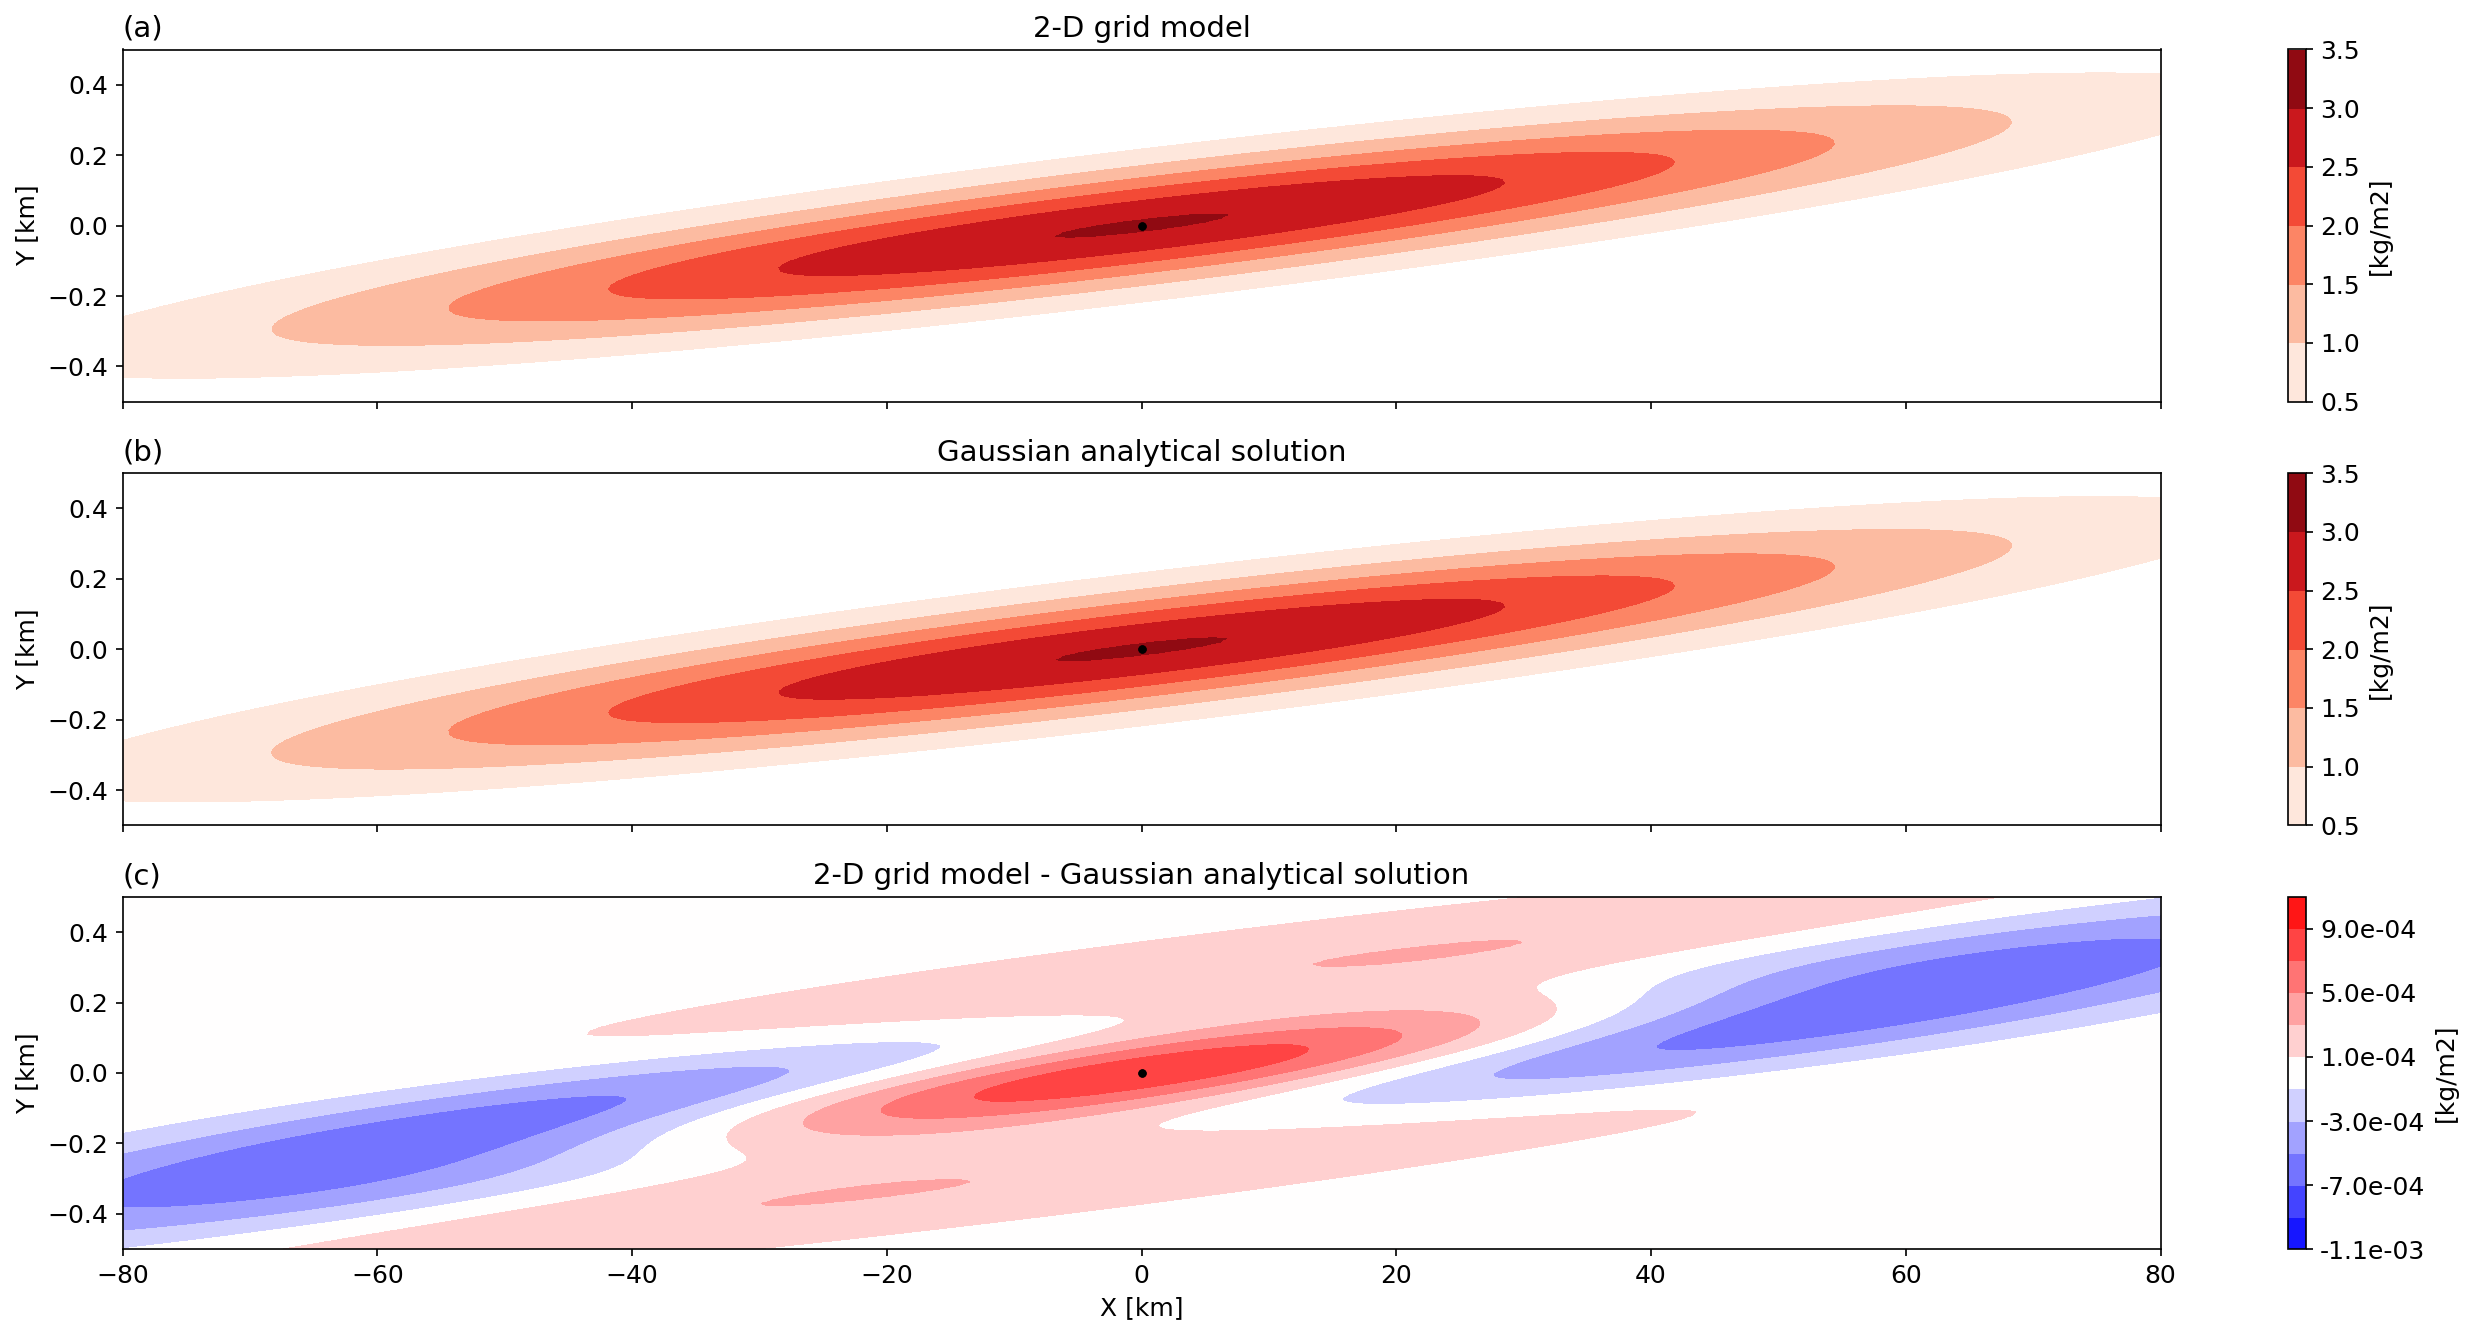

In [16]:
# plot 2-D model

fig = plt.figure(figsize=(18,9), dpi=150)

levs = np.arange(0.5,4.0,0.5)

# (1)
ax1 = plt.subplot(3,1,1)
ax1_contours = ax1.contourf(X[5:-5,5:-5]/1000, Y[5:-5,5:-5]/1000, Concnt1[5:-5,5:-5], \
                        levs, cmap='Reds')


ax1.plot(0, 0, 'k.')
ax1.plot(0, 0, 'k.')
# plt.plot(xnew/1000,ynew/1000,'b--')

cbar1 = plt.colorbar(ax1_contours, ax=ax1)
cbar1.ax.set_ylabel('[kg/m2]',fontsize=12)
cbar1.ax.tick_params(labelsize=12)

ax1.set_title('(a)',fontsize=14,loc='left')
ax1.set_title('2-D grid model',fontsize=14)

ax1.set_xlim([-80,80])
ax1.set_ylim([-0.5,0.5])

# ax1.set_xticks(fontsize=12)
# ax1.set_yticks(fontsize=12)
# ax1.set_xticklabels(xlabels, fontsize=12)
ax1.tick_params(axis='x', labelbottom=False, labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

ax1.set_ylabel('Y [km]',fontsize=12)


# # (2) plot guassian
ax2 = plt.subplot(3,1,2)
ax2_contours = ax2.contourf(X[5:-5,5:-5]/1000, Y[5:-5,5:-5]/1000, C_gau[5:-5,5:-5], \
                        levs, cmap='Reds')

ax2.plot(0, 0, 'k.')
ax2.plot(0, 0, 'k.')

cbar2 = plt.colorbar(ax2_contours, ax=ax2)
cbar2.ax.set_ylabel('[kg/m2]',fontsize=12)
cbar2.ax.tick_params(labelsize=12)

ax2.set_title('(b)',fontsize=14,loc='left')
ax2.set_title('Gaussian analytical solution',fontsize=14)

ax2.set_xlim([-80,80])
ax2.set_ylim([-0.5,0.5])

ax2.tick_params(axis='x', labelbottom=False, labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

ax2.set_ylabel('Y [km]',fontsize=12)


# # (3) plot the concentration difference
C_diff = Concnt1[5:-5,5:-5] - C_gau[5:-5,5:-5]

levs = np.arange(-1.1e-3,1.3e-3,0.2e-3)

ax3 = plt.subplot(3,1,3)
ax3_contours = ax3.contourf(X[5:-5,5:-5]/1000, Y[5:-5,5:-5]/1000, C_diff, \
                        levs, cmap='bwr')

ax3.plot(0, 0, 'k.')
ax3.plot(0, 0, 'k.')

cbar3 = plt.colorbar(ax3_contours, ax=ax3, format='%.1e')
cbar3.ax.set_ylabel('[kg/m2]',fontsize=12)
# cbar3.ax.set_yticklabels(['{:.9f}'.format(x) for x in levs])
cbar3.ax.tick_params(labelsize=12)

ax3.set_title('(c)',fontsize=14,loc='left')
ax3.set_title('2-D grid model - Gaussian analytical solution',fontsize=14)

ax3.set_xlim([-80,80])
ax3.set_ylim([-0.5,0.5])

ax3.tick_params(axis='x', labelsize=12);
ax3.tick_params(axis='y', labelsize=12);

ax3.set_ylabel('Y [km]',fontsize=12);
ax3.set_xlabel('X [km]',fontsize=12);

plt.tight_layout()

In [22]:
# spacial correlation

aa = Concnt1[5:-5,5:-5].flatten()
bb = C_gau[5:-5,5:-5].flatten()

np.corrcoef(aa,bb)

array([[1.        , 0.99999995],
       [0.99999995, 1.        ]])

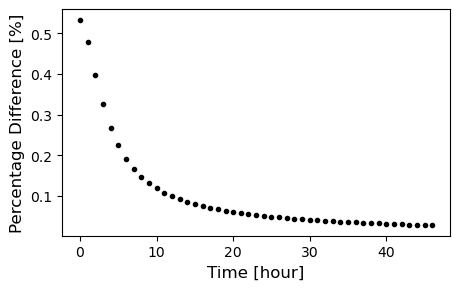

In [18]:
fig = plt.figure(figsize=(5, 3), dpi=100)


plt.plot( 100*(np.array(C1_center[2::])-C2_center[2::]) / np.array(C2_center[2::]), 'k.' )
plt.ylabel('Percentage Difference [%]', fontsize=12);
plt.xlabel('Time [hour]',fontsize=12);


In [19]:
# np.array(C1_center)-C2_center